## Step 1: Register an Image

In [1]:
from demo.demo_utils import load_image

# Load the original image from the specified path
original_image_path = "demo/data/1_original.jpg"
original_image = load_image(original_image_path)


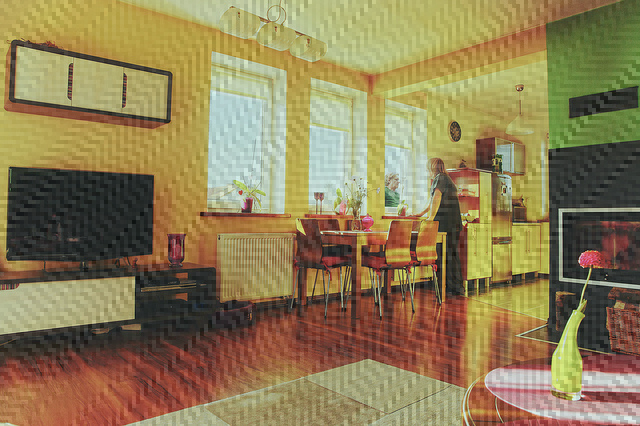

In [2]:
from demo.demo_utils import watermark_image

# Apply watermark to the original image and get the watermarked image and ground truth watermark
watermarked_img, ground_truth_watermark = watermark_image(original_image)
watermarked_img

In [3]:
from demo.secublox import register_image

# Register the watermarked image with the ground truth watermark using the secublox endpoint
result = register_image(watermarked_img, ground_truth_watermark)  # secublox endpoint call
result

True

## Step 2: Verify an Image

In [ ]:
from demo.demo_utils import image_verify, semantic_integrity
from demo.secublox import retrieve_wm_images
import numpy as np

def verify(candidate_image: np.ndarray) -> list[tuple[bool, np.ndarray]]:
    """
    Verify the candidate image against watermarked images retrieved from the database.

    Args:
        candidate_image (np.ndarray): The candidate image to be verified.

    Returns:
        list[tuple[bool, np.ndarray]]: A list of tuples containing a boolean indicating if the image is valid
        and the matched image.
    """
    # Retrieve watermarked images from the database
    images = retrieve_wm_images()

    # List to store images that match the candidate image
    matches = []
    for image in images:
        gt_watermark = image["watermark_matrix"]
        is_match = image_verify(candidate_image, gt_watermark)
        if is_match:
            matches.append(image)

    # List to store the verification results
    results = []
    for matched_image in matches:
        # Check the semantic integrity of the matched image with the candidate image
        is_valid, _ = semantic_integrity(matched_image, candidate_image)
        results.append((is_valid, matched_image))

    return results

## Persona: user who wants to verify an image

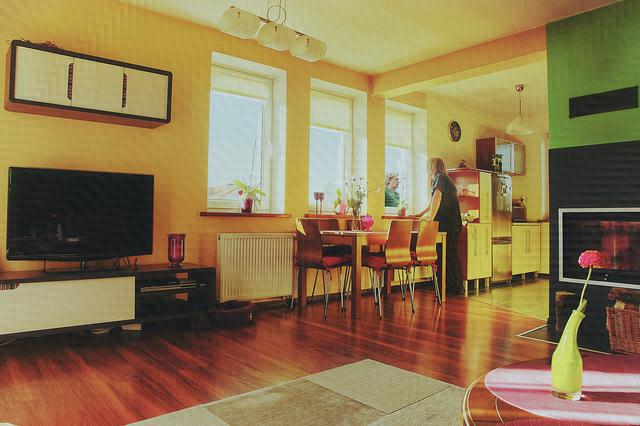

In [ ]:
from demo.demo_utils import load_image
from PIL import Image

# Load the candidate image from the specified path
candidate_image_path = "demo/data/1_watermarked.jpg"
candidate_image = load_image(candidate_image_path)

# Display the candidate image
Image.fromarray(candidate_image)

In [6]:
# Verify the candidate image
results = verify(candidate_image)
results

Similarity Score: 99.2156862745098
Is extracted watermark similar: True
Is extracted watermark similar: False
Is extracted watermark similar: False
Is extracted watermark similar: False
Similarity Score: 49.673202614379086
Is extracted watermark similar: False
Evaluating integrity with tools...
  0%|                                       | 0/2 [00:00<?, ?it/s]Captioning reference_image_path...
Captioning candidate_image_path...
Comparing captions...
Compute embeddings for both captions...
Compute cosine similarity between the embeddings...
ImageCaptioningTool:  50%|████████████████████▌                       | 1/2 [00:32<00:32, 32.60s/it]
Detecting objects for reference_image_path...
Detecting objects for candidate_image_path...
ObjectDetectionTool: 100%|████████████████████████████████████████████| 2/2 [01:46<00:00, 53.38s/it]
Aggregating tool responses...


[(True,
  {'image_path': 'demo/data/1_watermarked.jpg',
   'image': array([[[186, 160,  86],
           [190, 164,  90],
           [192, 166,  92],
           ...,
           [ 79,  88,  41],
           [ 79,  88,  41],
           [ 78,  87,  40]],
   
          [[186, 160,  86],
           [189, 163,  89],
           [191, 165,  91],
           ...,
           [ 80,  89,  42],
           [ 79,  88,  41],
           [ 78,  87,  40]],
   
          [[187, 161,  87],
           [190, 164,  90],
           [191, 165,  91],
           ...,
           [ 80,  89,  42],
           [ 80,  89,  42],
           [ 79,  88,  41]],
   
          ...,
   
          [[221, 210, 164],
           [214, 201, 157],
           [221, 203, 163],
           ...,
           [199, 167, 172],
           [197, 164, 171],
           [196, 163, 170]],
   
          [[198, 200, 160],
           [199, 200, 160],
           [203, 199, 162],
           ...,
           [204, 151, 157],
           [199, 146, 152],
    